**ASSIGNMENT 4**

1. Group Name: \\
   Member Names: Tanner Giddings and Tamara Micic\\
   Member Student Numbers: 300172545 and 300163312\\
   Report Title: Customer Review Classifier\\

**Derived Datasets**

This notebook is a starting point for Assignment 4. In this assignment, you will perform a classification empirical study. This notebook will help you to create derived datasets in Section 2 of the assignment.

In [ ]:
#let's start by installing spaCy
!pip install spacy

In [ ]:
import spacy
import pandas as pd
import numpy as np

You have been given a list of datasets in the assignment description. Choose one of the datasets and provide the link below and read the dataset using pandas. You should provide a link to your own Github repository even if you are using a reduced version of a dataset from your TA's repository.

add description of the dataset and your justification of the choices made to obtain the derived datasets

In [ ]:
#Load the dataset you chose.
# Make sure the Notebook can load your dataset, just like previous assignments.

# url = 'https://raw.githubusercontent.com/baharin/CSI4106-Assignment4-Datasets/main/reduced_file_cnnnews.csv'
# url = 'https://raw.githubusercontent.com/baharin/CSI4106-Assignment4-Datasets/main/reduced_drugsComTest_raw_fiveclasses.csv'
#url = 'https://raw.githubusercontent.com/baharin/CSI4106-Assignment4-Datasets/main/reduced_file_AirPassengerReviews.csv'

#provide the link to the raw version of dataset. You *need* to provide a link to *your own* github repository. DO NOT use the link that is provided as an example.

url = 'https://raw.githubusercontent.com/TannerGiddings21/A3/main/data.csv'

In [ ]:
data = pd.read_csv(url)
data = data[:1000] # we are only using the first 1000 entries, as the run time was too long using all of the entries

In [ ]:
len(data)

1000

In [ ]:
data.head()

,customer_review,NPS Score
0,London to Izmir via Istanbul. First time I'd ...,Passive
1,Istanbul to Bucharest. We make our check in i...,Detractor
2,Rome to Prishtina via Istanbul. I flew with t...,Detractor
3,Flew on Turkish Airlines IAD-IST-KHI and retu...,Promoter
4,Mumbai to Dublin via Istanbul. Never book Tur...,Detractor


We chose this dataset as it was the very straightforward, there's one independant column (customer_review), and there is one dependent column (NPS Score). This makes it much simpler to understand. It is also essentially a sentiment analysis task, when we will try to classify into one of 3 categories (detractor, passive, promotor) based on choice of words. This is something that we find interesting and would like to explore.

This is where you create the NLP pipeline. load() will download the correct model (English).

In [ ]:
nlp = spacy.load("en_core_web_sm")

Applying the pipeline to every sentences creates a Document where every word is a Token object.

Doc: https://spacy.io/api/doc

Token: https://spacy.io/api/token

In [ ]:
#Apply nlp pipeline to the column that has your sentences.
data['tokenized'] = data['customer_review'].apply(nlp)

In [ ]:
data.head()

,customer_review,NPS Score,tokenized
0,London to Izmir via Istanbul. First time I'd ...,Passive,"( , London, to, Izmir, via, Istanbul, ., First..."
1,Istanbul to Bucharest. We make our check in i...,Detractor,"( , Istanbul, to, Bucharest, ., We, make, our,..."
2,Rome to Prishtina via Istanbul. I flew with t...,Detractor,"( , Rome, to, Prishtina, via, Istanbul, ., I, ..."
3,Flew on Turkish Airlines IAD-IST-KHI and retu...,Promoter,"( , Flew, on, Turkish, Airlines, IAD, -, IST, ..."
4,Mumbai to Dublin via Istanbul. Never book Tur...,Detractor,"( , Mumbai, to, Dublin, via, Istanbul, ., Neve..."


A Token object has many attributes such as part-of-speech (pos_), lemma (lemma_), etc. Take a look at the documentation to see all attributes.

The following function is an example on how you can fetch a specific pos tagging from a sentence. We return the lemmatization because we only want the infinitive word.

In [ ]:
#create empty dataframes that will store your derived datasets

derived_dataset1 = pd.DataFrame(columns = ['Class', 'pos'])
derived_dataset2 = pd.DataFrame(columns = ['Class', 'pos-np'])

In [ ]:
def get_pos(sentence, wanted_pos): #wanted_pos refers to the desired pos tagging
    verbs_and_adjectives = []
    for token in sentence:
        if token.pos_ in wanted_pos:
            verbs_and_adjectives.append(token.lemma_) # lemma returns a number. lemma_ return a string
    return ' '.join(verbs_and_adjectives) # return value is as a string and not a list for countVectorizer

In [ ]:
#As an example, we use the above function to fetch all the verbs. We store this information in our first derived dataset
derived_dataset1['pos'] = data['tokenized'].apply(lambda sent : get_pos(sent, ['VERB', 'ADJ']))
derived_dataset1['Class'] = data['NPS Score']

In [ ]:
derived_dataset1.head()

,Class,pos
0,Passive,first fly find good nice great delay miss Most...
1,Detractor,make take go let ™ say overbooke have wait bri...
2,Detractor,fly several past say get bad bad fly have norm...
3,Promoter,return maintain fly leave excellent inflight e...
4,Detractor,turkish travel get have other ask stay care ma...


For derived dataset 1, we chose to use the POS tags verbs and adjectives. We think that these are both very important for classifying this dataset, which is essentially a sentiment analysis task. Verbs can convey sentiment analysis - for example verbs like "love", "admire", and "appreciate" are indicators of positive sentiment, while verbs like "hate", "dislike", and "regret" are indicators of negative sentiment. Similarly, adjectives also convey sentiment - fpr example adjectives such as "excellent" and "easy" convey positive sentiment, while adjectives such as "worse", poor", and "disorganized" convey negative sentiment.

In [ ]:
from tqdm import tqdm
global pbar
pbar = tqdm(total = len(data), position=0) #Added this line to track the progress of the function below
def get_named_entities(sentence, nlp):
    #Choosing TIME as named entity
    doc = nlp(sentence)
    entities = ""
    for ent in doc.ents:
        if ent.label_ == 'TIME':
            entities += " " + ent.text # adding entities related to time
    pbar.update(1)
    return entities[1:]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
#Change this line to fetch your desired pos taggings for the second derived dataset
pbar.reset()
derived_dataset2['pos-np'] = data['tokenized'].apply(lambda sent : get_pos(sent, ['ADJ']) + " " + get_named_entities(sent, nlp)) # derived dataset 2 contains adjectives and time-related words
derived_dataset2['Class'] = data['NPS Score']

100%|█████████▉| 999/1000 [00:35<00:00, 33.08it/s]

In [ ]:
derived_dataset2.head()

,Class,pos-np
0,Passive,first good nice great Most contradictory littl...
1,Detractor,first last the morning 2 hours
2,Detractor,several past bad bad normal most useless few w...
3,Promoter,excellent inflight extensive easy excellent in...
4,Detractor,turkish other more more than 3 hours


For derived dataset 2, we chose 'TIME' as a named entity. We think words related to time could convey sentiment, for example "3 hours later" could be an indication of something (e.g. a flight) being 3 hours late, which could be related to negative sentiment. We also included adjective as a POS, as we think this is a very important POS for sentiment analysis.

In [ ]:
#For Derived Dataset 2, you also need to include Named Entities
#Below is just an example of obtaining such entities on a specific sentence, but you would do NER
#on the dataset of your choice.
#You can choose the types of entities (dates, organization, people) that you want,
#and then in your derived dataset, just make sure you include these entities separated by spaces (as shown for verbs)
#in a previous cell.

sentence = "apple is looking at buying U.K. startup for $1 billion"
doc = nlp(sentence)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


Now that you have your derived datasets, you can move to perform your classificaton task.

**Perform Classification Task**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS
vectorizer_original = TfidfVectorizer(stop_words=list(stop_words)) # creating the tfidf vectorizer, removing stopwords
tfidf_matrix_original = vectorizer_original.fit_transform(data['customer_review']) # fit and transform the reviews
feature_names_original = vectorizer_original.get_feature_names_out() # getting the words from the review
dense_array_original = tfidf_matrix_original.toarray() # for proper formatting
tfidf_df_original = pd.DataFrame(dense_array_original, columns = feature_names_original) # matrix that has words as columns and their tfidf scores for each review (row)
tfidf_df_original.head()

,00,000,003,0045,0050,00am,00om,00pm,01,02,...,œthe,œthere,œthey,œtransfer,œtransferâ,œtry,œturkish,œwe,œyes,œyou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vectorizer_dd1 = TfidfVectorizer(stop_words=list(stop_words)) # creating the tfidf vectorizer, removing stopwords
tfidf_matrix_dd1 = vectorizer_dd1.fit_transform(derived_dataset1['pos']) # fit and transform the contents of 'pos'
feature_names_dd1 = vectorizer_dd1.get_feature_names_out() # getting the words
dense_array_dd1 = tfidf_matrix_dd1.toarray() # for proper formatting
tfidf_df_dd1 = pd.DataFrame(dense_array_dd1, columns = feature_names_dd1) # matrix that has words as columns and their tfidf scores for each review (row)
tfidf_df_dd1.head()

,10hr,11th,1300,15min,16th,17th,18th,1h20,1hr,1st,...,young,yummy,œcase,œmake,œnew,œno,œnot,œold,œsalad,œtransfer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vectorizer_dd2 = TfidfVectorizer(stop_words=list(stop_words)) # creating the tfidf vectorizer, removing stopwords
tfidf_matrix_dd2 = vectorizer_dd2.fit_transform(derived_dataset2['pos-np']) # fit and transform the contents of 'pos-np'
feature_names_dd2 = vectorizer_dd2.get_feature_names_out()  # getting the words
dense_array_dd2 = tfidf_matrix_dd2.toarray() # for proper formatting
tfidf_df_dd2 = pd.DataFrame(dense_array_dd2, columns = feature_names_dd2) # matrix that has words as columns and their tfidf scores for each review (row)
tfidf_df_dd2.head()

,00,01,02,03,04,05,05am,10,1045,10hr,...,wow,wrong,yelled,young,yummy,œnew,œno,œnot,œold,œtransfer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.134898,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Logistic Regression

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# logistic regression models for original dataset, on derived dataset 1, and derived dataset 2
logreg_original = LogisticRegression(multi_class = 'multinomial', class_weight='balanced') # multinomial classification, balancing since there are more detractor reviews than the other two class
logreg_dd1 = LogisticRegression(multi_class = 'multinomial', class_weight='balanced') # multinomial classification, balancing since there are more detractor reviews than the other two class
logreg_dd2 = LogisticRegression(multi_class = 'multinomial', class_weight='balanced') # multinomial classification, balancing since there are more detractor reviews than the other two class

# 4-fold cross validation on the original dataset, on derived dataset 1, and derived dataset 2
cv_logreg_original = cross_validate(logreg_original, tfidf_df_original, data['NPS Score'], cv=4, return_estimator=True)
cv_logreg_dd1 = cross_validate(logreg_dd1, tfidf_df_dd1, derived_dataset1['Class'], cv=4, return_estimator=True)
cv_logreg_dd2 = cross_validate(logreg_dd2, tfidf_df_dd2, derived_dataset2['Class'], cv=4, return_estimator=True)

In [ ]:
print("Test scores of cross validation for original dataset:", cv_logreg_original['test_score'])
print("Test scores of cross validation for derived dataset 1:", cv_logreg_dd1['test_score'])
print("Test scores of cross validation for derived dataset 2:", cv_logreg_dd2['test_score'])

Test scores of cross validation for original dataset: [0.82  0.772 0.736 0.796]
Test scores of cross validation for derived dataset 1: [0.804 0.772 0.684 0.8  ]
Test scores of cross validation for derived dataset 2: [0.768 0.8   0.692 0.768]


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score

# class predictions
predictions_logreg_original = cross_val_predict(logreg_original, tfidf_df_original, data['NPS Score'], cv=4)
results_logreg_original = pd.DataFrame({"data_NPS_Score" : list(data['NPS Score']), "Predictions" : list(predictions_logreg_original)})

print("Original dataset")
print("Micro precision:", precision_score(results_logreg_original['data_NPS_Score'], results_logreg_original['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_logreg_original['data_NPS_Score'], results_logreg_original['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_logreg_original['data_NPS_Score'], results_logreg_original['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_logreg_original['data_NPS_Score'], results_logreg_original['Predictions'], average="macro"))
print(" ")

predictions_logreg_dd1 = cross_val_predict(logreg_dd1, tfidf_df_dd1, derived_dataset1['Class'], cv=4)
results_logreg_dd1 = pd.DataFrame({"dd1_Class" : list(derived_dataset1['Class']), "Predictions" : list(predictions_logreg_dd1)})

print("Derived dataset 1")
print("Micro precision:", precision_score(results_logreg_dd1['dd1_Class'], results_logreg_dd1['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_logreg_dd1['dd1_Class'], results_logreg_dd1['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_logreg_dd1['dd1_Class'], results_logreg_dd1['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_logreg_dd1['dd1_Class'], results_logreg_dd1['Predictions'], average="macro"))
print(" ")

predictions_logreg_dd2 = cross_val_predict(logreg_dd2, tfidf_df_dd2, derived_dataset2['Class'], cv=4)
results_logreg_dd2 = pd.DataFrame({"dd2_Class" : list(derived_dataset2['Class']), "Predictions" : list(predictions_logreg_dd2)})

print("Derived dataset 2")
print("Micro precision:", precision_score(results_logreg_dd2['dd2_Class'], results_logreg_dd2['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_logreg_dd2['dd2_Class'], results_logreg_dd2['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_logreg_dd2['dd2_Class'], results_logreg_dd2['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_logreg_dd2['dd2_Class'], results_logreg_dd2['Predictions'], average="macro"))

100%|██████████| 1000/1000 [00:53<00:00, 33.08it/s]

Original dataset
Micro precision: 0.781
Macro precision: 0.6577965646806226
Micro recall:  0.781
Macro recall:  0.6501940172986477
 
Derived dataset 1
Micro precision: 0.765
Macro precision: 0.6519478605685501
Micro recall:  0.765
Macro recall:  0.6513155534273967
 
Derived dataset 2
Micro precision: 0.757
Macro precision: 0.6508993910954696
Micro recall:  0.757
Macro recall:  0.6513900569313896


There aren't very big differences in precision and recall between datasets, but the original has the best scores, then derived dataset1, then derived dataset 2. This makes sense since there is more data to work with in the original dataset.

Multilayer Perceptron with 1 hidden layer with 1000 neurons

In [ ]:
from sklearn.neural_network import MLPClassifier

# multilayer perceptron models for original dataset, on derived dataset 1, and derived dataset 2
clf1_original = MLPClassifier(hidden_layer_sizes=(1000,))
clf1_dd1 = MLPClassifier(hidden_layer_sizes=(1000,))
clf1_dd2 = MLPClassifier(hidden_layer_sizes=(1000,))

# 4-fold cross validation on the original dataset, on derived dataset 1, and derived dataset 2
cv1_original = cross_validate(clf1_original, tfidf_df_original, data['NPS Score'], cv=4, return_estimator=True)
cv1_dd1 = cross_validate(clf1_dd1, tfidf_df_dd1, derived_dataset1['Class'], cv=4, return_estimator=True)
cv1_dd2 = cross_validate(clf1_dd2, tfidf_df_dd2, derived_dataset2['Class'], cv=4, return_estimator=True)

In [ ]:
print("Test scores of cross validation for original dataset:", cv1_original['test_score'])
print("Test scores of cross validation for derived dataset 1:", cv1_dd1['test_score'])
print("Test scores of cross validation for derived dataset 2:", cv1_dd2['test_score'])

Test scores of cross validation for original dataset: [0.82  0.784 0.776 0.796]
Test scores of cross validation for derived dataset 1: [0.824 0.764 0.744 0.816]
Test scores of cross validation for derived dataset 2: [0.776 0.736 0.684 0.756]


In [ ]:
# class predictions
predictions_clf1_original = cross_val_predict(clf1_original, tfidf_df_original, data['NPS Score'], cv=4)
results_clf1_original = pd.DataFrame({"data_NPS_Score" : list(data['NPS Score']), "Predictions" : list(predictions_clf1_original)})

print("Original dataset")
print("Micro precision:", precision_score(results_clf1_original['data_NPS_Score'], results_clf1_original['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_clf1_original['data_NPS_Score'], results_clf1_original['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_clf1_original['data_NPS_Score'], results_clf1_original['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_clf1_original['data_NPS_Score'], results_clf1_original['Predictions'], average="macro"))
print(" ")

predictions_clf1_dd1 = cross_val_predict(clf1_dd1, tfidf_df_dd1, derived_dataset1['Class'], cv=4)
results_clf1_dd1 = pd.DataFrame({"dd1_Class" : list(derived_dataset1['Class']), "Predictions" : list(predictions_clf1_dd1)})

print("Derived dataset 1")
print("Micro precision:", precision_score(results_clf1_dd1['dd1_Class'], results_clf1_dd1['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_clf1_dd1['dd1_Class'], results_clf1_dd1['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_clf1_dd1['dd1_Class'], results_clf1_dd1['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_clf1_dd1['dd1_Class'], results_clf1_dd1['Predictions'], average="macro"))
print(" ")

predictions_clf1_dd2 = cross_val_predict(clf1_dd2, tfidf_df_dd2, derived_dataset2['Class'], cv=4)
results_clf1_dd2 = pd.DataFrame({"dd2_Class" : list(derived_dataset2['Class']), "Predictions" : list(predictions_clf1_dd2)})

print("Derived dataset 2")
print("Micro precision:", precision_score(results_clf1_dd2['dd2_Class'], results_clf1_dd2['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_clf1_dd2['dd2_Class'], results_clf1_dd2['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_clf1_dd2['dd2_Class'], results_clf1_dd2['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_clf1_dd2['dd2_Class'], results_clf1_dd2['Predictions'], average="macro"))

Original dataset
Micro precision: 0.795
Macro precision: 0.6543426522754688
Micro recall:  0.795
Macro recall:  0.6350358918208046
 
Derived dataset 1
Micro precision: 0.784
Macro precision: 0.6647251437622228
Micro recall:  0.784
Macro recall:  0.648634100183796
 
Derived dataset 2
Micro precision: 0.74
Macro precision: 0.6049379911782063
Micro recall:  0.74
Macro recall:  0.6068048642067322


It can be seen that there is a difference between the original dataset and the derived dataset 2. There is a slight difference between the original dataset and the derived dataset 1, this could be due to the models's differences, however it might be due to the way the data was arranged during the cross-validation.

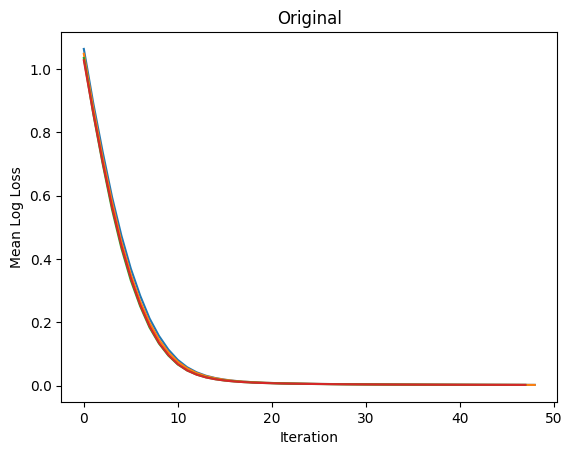

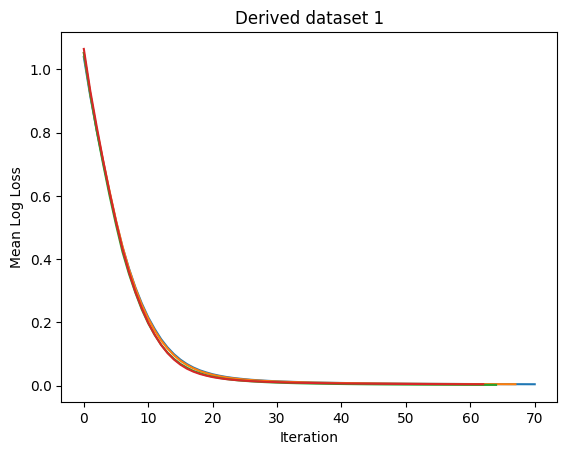

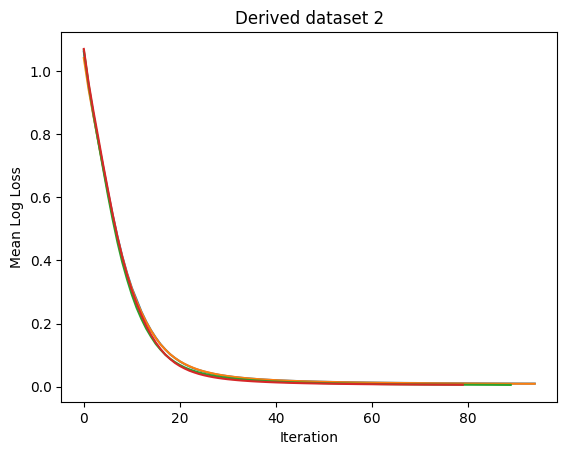

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colours = list(mcolors.TABLEAU_COLORS.values())

# Plot for the first dataset (cv1_original)
fig1, ax1 = plt.subplots()
counter = 0
for model in cv1_original['estimator']:
    loss_curve = model.loss_curve_
    ax1.plot(range(len(loss_curve)), loss_curve, color=colours[counter])
    counter += 1
ax1.set_title('Original')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Mean Log Loss')

# Plot for the second dataset (cv1_dd1)
fig2, ax2 = plt.subplots()
counter = 0
for model in cv1_dd1['estimator']:
    loss_curve = model.loss_curve_
    ax2.plot(range(len(loss_curve)), loss_curve, color=colours[counter])
    counter += 1
ax2.set_title('Derived dataset 1')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Mean Log Loss')

# Plot for the third dataset (cv1_dd2)
fig3, ax3 = plt.subplots()
counter = 0
for model in cv1_dd2['estimator']:
    loss_curve = model.loss_curve_
    ax3.plot(range(len(loss_curve)), loss_curve, color=colours[counter])
    counter += 1
ax3.set_title('Derived dataset 2')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Mean Log Loss')

# Show the plots
plt.show()

Here, the mean log loss of the models is shown. We can see that the model trained on the original dataset, then its the dataset trained on the derived dataset 1 and lastly the derived dataset 2 takes the longest to converge. This supports our previous hypothesis that the model trained on the original dataset is better than the model trained on the derived dataset 1 which is in turn better than the model trained on the derived dataset 2.

Multilayer Perceptron with 2 hidden layers with 1000 neurons each

In [ ]:
# multilayer perceptron models for original dataset, on derived dataset 1, and derived dataset 2
clf2_original = MLPClassifier(hidden_layer_sizes=(1000,1000))
clf2_dd1 = MLPClassifier(hidden_layer_sizes=(1000,1000))
clf2_dd2 = MLPClassifier(hidden_layer_sizes=(1000,1000))

# 4-fold cross validation, on the original dataset, on derived dataset 1, and derived dataset 2
cv2_original = cross_validate(clf2_original, tfidf_df_original, data['NPS Score'], cv=4, return_estimator=True)
cv2_dd1 = cross_validate(clf2_dd1, tfidf_df_dd1, derived_dataset1['Class'], cv=4, return_estimator=True)
cv2_dd2 = cross_validate(clf2_dd2, tfidf_df_dd2, derived_dataset2['Class'], cv=4, return_estimator=True)

In [ ]:
print("Test scores of cross validation for original dataset:", cv2_original['test_score'])
print("Test scores of cross validation for derived dataset 1:", cv2_dd1['test_score'])
print("Test scores of cross validation for derived dataset 2:", cv2_dd2['test_score'])

Test scores of cross validation for original dataset: [0.8   0.784 0.744 0.776]
Test scores of cross validation for derived dataset 1: [0.82  0.8   0.724 0.808]
Test scores of cross validation for derived dataset 2: [0.784 0.768 0.684 0.764]


In [ ]:
# class predictions
predictions_clf2_original = cross_val_predict(clf2_original, tfidf_df_original, data['NPS Score'], cv=4)
results_clf2_original = pd.DataFrame({"data_NPS_Score" : list(data['NPS Score']), "Predictions" : list(predictions_clf2_original)})

print("Original dataset")
print("Micro precision:", precision_score(results_clf2_original['data_NPS_Score'], results_clf2_original['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_clf2_original['data_NPS_Score'], results_clf2_original['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_clf2_original['data_NPS_Score'], results_clf2_original['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_clf2_original['data_NPS_Score'], results_clf2_original['Predictions'], average="macro"))
print(" ")

predictions_clf2_dd1 = cross_val_predict(clf2_dd1, tfidf_df_dd1, derived_dataset1['Class'], cv=4)
results_clf2_dd1 = pd.DataFrame({"dd1_Class" : list(derived_dataset1['Class']), "Predictions" : list(predictions_clf2_dd1)})

print("Derived dataset 1")
print("Micro precision:", precision_score(results_clf2_dd1['dd1_Class'], results_clf2_dd1['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_clf2_dd1['dd1_Class'], results_clf2_dd1['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_clf2_dd1['dd1_Class'], results_clf2_dd1['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_clf2_dd1['dd1_Class'], results_clf2_dd1['Predictions'], average="macro"))
print(" ")

predictions_clf2_dd2 = cross_val_predict(clf2_dd2, tfidf_df_dd2, derived_dataset2['Class'], cv=4)
results_clf2_dd2 = pd.DataFrame({"dd2_Class" : list(derived_dataset2['Class']), "Predictions" : list(predictions_clf2_dd2)})

print("Derived dataset 2")
print("Micro precision:", precision_score(results_clf2_dd2['dd2_Class'], results_clf2_dd2['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_clf2_dd2['dd2_Class'], results_clf2_dd2['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_clf2_dd2['dd2_Class'], results_clf2_dd2['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_clf2_dd2['dd2_Class'], results_clf2_dd2['Predictions'], average="macro"))

Original dataset
Micro precision: 0.772
Macro precision: 0.6401184090961362
Micro recall:  0.772
Macro recall:  0.6389702582173556
 
Derived dataset 1
Micro precision: 0.786
Macro precision: 0.6838337590877422
Micro recall:  0.786
Macro recall:  0.6746103739938629
 
Derived dataset 2
Micro precision: 0.753
Macro precision: 0.6254804602044653
Micro recall:  0.753
Macro recall:  0.6242894073539642


The results are similar, but interestingly, derived dataset 1 is the best out of the three. This could indicate that the relationship between verbs and adjectives is more non-linear than the relationship features in the original dataset and the features in the derived dataset 2. However, the differences are so small that it can't be said for sure if this is due to the differences in the data, or just the way the cross-validation arranged it.

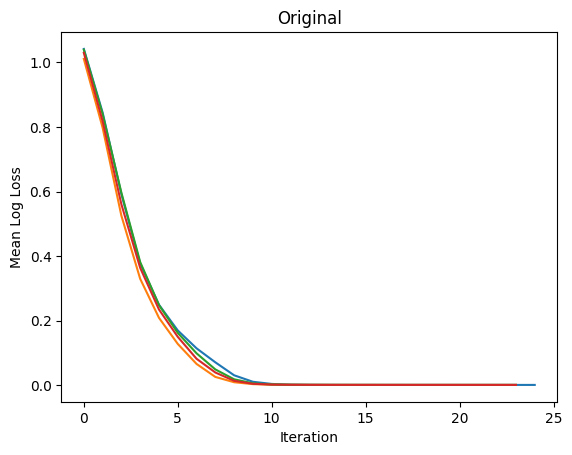

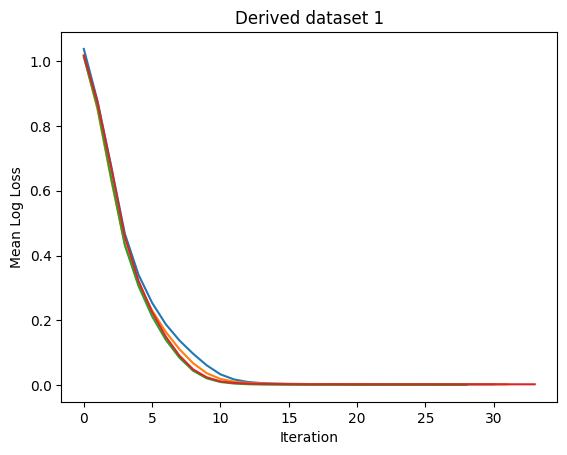

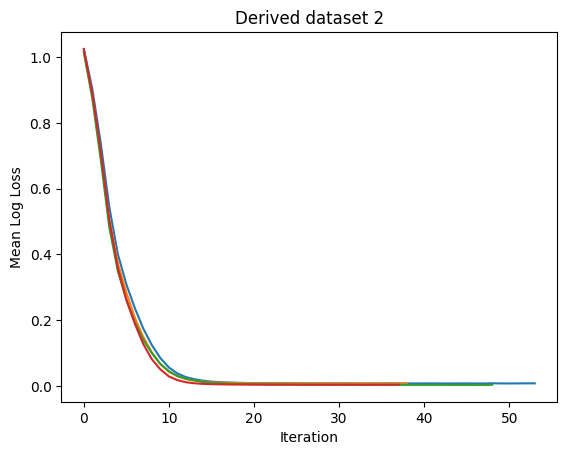

In [ ]:
# Plot for the first dataset (cv2_original)
fig1, ax1 = plt.subplots()
counter = 0
for model in cv2_original['estimator']:
    loss_curve = model.loss_curve_
    ax1.plot(range(len(loss_curve)), loss_curve, color=colours[counter])
    counter += 1
ax1.set_title('Original')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Mean Log Loss')

# Plot for the second dataset (cv2_dd1)
fig2, ax2 = plt.subplots()
counter = 0
for model in cv2_dd1['estimator']:
    loss_curve = model.loss_curve_
    ax2.plot(range(len(loss_curve)), loss_curve, color=colours[counter])
    counter += 1
ax2.set_title('Derived dataset 1')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Mean Log Loss')

# Plot for the third dataset (cv2_dd2)
fig3, ax3 = plt.subplots()
counter = 0
for model in cv2_dd2['estimator']:
    loss_curve = model.loss_curve_
    ax3.plot(range(len(loss_curve)), loss_curve, color=colours[counter])
    counter += 1
ax3.set_title('Derived dataset 2')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Mean Log Loss')

# Show the plots
plt.show()


These models converge much quicker than the last, indicating that it is a better fit to the data. We see the same trends as before on which models converge quickest, i.e. the model trained on the original dataset converges quicker than the one trained on the derived dataset 1 which in turn converges quicker than the one trained on the derived dataset 2.

Multilayer Perceptron with 5 hidden layers of size 1000, 1000, 100, 100, and 100 neurons, in that order.

In [ ]:
# multilayer perceptron models for original dataset, on derived dataset 1, and derived dataset 2
clf3_original = MLPClassifier(hidden_layer_sizes=(1000,1000, 100, 100, 100))
clf3_dd1 = MLPClassifier(hidden_layer_sizes=(1000,1000, 100, 100, 100))
clf3_dd2 = MLPClassifier(hidden_layer_sizes=(1000,1000, 100, 100, 100))

# 4-fold cross validation on the original dataset, on derived dataset 1, and derived dataset 2
cv3_original = cross_validate(clf3_original, tfidf_df_original, data['NPS Score'], cv=4, return_estimator=True)
cv3_dd1 = cross_validate(clf3_dd1, tfidf_df_dd1, derived_dataset1['Class'], cv=4, return_estimator=True)
cv3_dd2 = cross_validate(clf3_dd2, tfidf_df_dd2, derived_dataset2['Class'], cv=4, return_estimator=True)

In [ ]:
print("Test scores of cross validation for original dataset:", cv3_original['test_score'])
print("Test scores of cross validation for derived dataset 1:", cv3_dd1['test_score'])
print("Test scores of cross validation for derived dataset 2:", cv3_dd2['test_score'])

Test scores of cross validation for original dataset: [0.82  0.748 0.664 0.74 ]
Test scores of cross validation for derived dataset 1: [0.784 0.764 0.708 0.78 ]
Test scores of cross validation for derived dataset 2: [0.776 0.736 0.676 0.74 ]


In [ ]:
# class predictions
predictions_clf3_original = cross_val_predict(clf3_original, tfidf_df_original, data['NPS Score'], cv=4)
results_clf3_original = pd.DataFrame({"data_NPS_Score" : list(data['NPS Score']), "Predictions" : list(predictions_clf3_original)})

print("Original dataset")
print("Micro precision:", precision_score(results_clf3_original['data_NPS_Score'], results_clf3_original['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_clf3_original['data_NPS_Score'], results_clf3_original['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_clf3_original['data_NPS_Score'], results_clf3_original['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_clf3_original['data_NPS_Score'], results_clf3_original['Predictions'], average="macro"))
print(" ")

predictions_clf3_dd1 = cross_val_predict(clf3_dd1, tfidf_df_dd1, derived_dataset1['Class'], cv=4)
results_clf3_dd1 = pd.DataFrame({"dd1_Class" : list(derived_dataset1['Class']), "Predictions" : list(predictions_clf3_dd1)})

print("Derived dataset 1")
print("Micro precision:", precision_score(results_clf3_dd1['dd1_Class'], results_clf3_dd1['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_clf3_dd1['dd1_Class'], results_clf3_dd1['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_clf3_dd1['dd1_Class'], results_clf3_dd1['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_clf3_dd1['dd1_Class'], results_clf3_dd1['Predictions'], average="macro"))
print(" ")

predictions_clf3_dd2 = cross_val_predict(clf3_dd2, tfidf_df_dd2, derived_dataset2['Class'], cv=4)
results_clf3_dd2 = pd.DataFrame({"dd2_Class" : list(derived_dataset2['Class']), "Predictions" : list(predictions_clf3_dd2)})

print("Derived dataset 2")
print("Micro precision:", precision_score(results_clf3_dd2['dd2_Class'], results_clf3_dd2['Predictions'], average="micro"))
print("Macro precision:", precision_score(results_clf3_dd2['dd2_Class'], results_clf3_dd2['Predictions'], average="macro"))
print("Micro recall: ", recall_score(results_clf3_dd2['dd2_Class'], results_clf3_dd2['Predictions'], average="micro"))
print("Macro recall: ", recall_score(results_clf3_dd2['dd2_Class'], results_clf3_dd2['Predictions'], average="macro"))

Original dataset
Micro precision: 0.77
Macro precision: 0.6428544948072478
Micro recall:  0.77
Macro recall:  0.6356087855457818
 
Derived dataset 1
Micro precision: 0.761
Macro precision: 0.6950922536691446
Micro recall:  0.761
Macro recall:  0.6946366493987032
 
Derived dataset 2
Micro precision: 0.737
Macro precision: 0.6653721989774075
Micro recall:  0.737
Macro recall:  0.6704945264283549


For these models, the accuracy seems to have slightly decreased. This could be since there are too many parameters and the model is overfit.

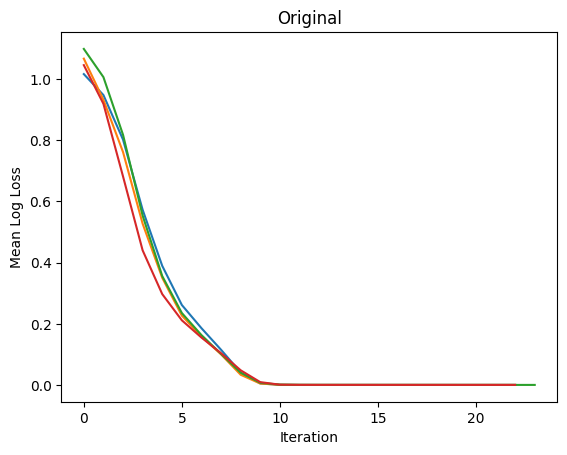

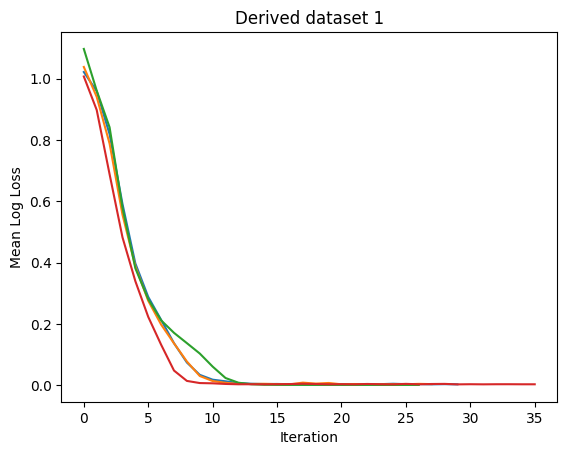

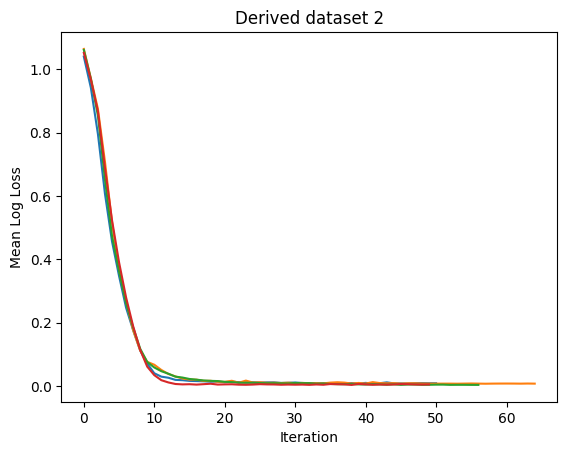

In [ ]:
# Plot for the first dataset (cv3_original)
fig1, ax1 = plt.subplots()
counter = 0
for model in cv3_original['estimator']:
    loss_curve = model.loss_curve_
    ax1.plot(range(len(loss_curve)), loss_curve, color=colours[counter])
    counter += 1
ax1.set_title('Original')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Mean Log Loss')

# Plot for the second dataset (cv3_dd1)
fig2, ax2 = plt.subplots()
counter = 0
for model in cv3_dd1['estimator']:
    loss_curve = model.loss_curve_
    ax2.plot(range(len(loss_curve)), loss_curve, color=colours[counter])
    counter += 1
ax2.set_title('Derived dataset 1')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Mean Log Loss')

# Plot for the third dataset (cv3_dd2)
fig3, ax3 = plt.subplots()
counter = 0
for model in cv3_dd2['estimator']:
    loss_curve = model.loss_curve_
    ax3.plot(range(len(loss_curve)), loss_curve, color=colours[counter])
    counter += 1
ax3.set_title('Derived dataset 2')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Mean Log Loss')

# Show the plots
plt.show()

This model seems to take a bit longer than the previous one to converge. This can also indicate that this model is a worst fit than the previous one.

Comparing the 4 different models, they obtain very similar results for precision/recall measures. There is no evidence that adding more depth to the MLP helps with performance, as one might hypothesize. Neural networks are a very "black-box" method, so not being able to make concrete conclusions about improving accuracy is not surprising. It is also interesting to note that logistic regression performs very similarly to MLP, even though it is a much simpler model, and takes much less time to execute. Therefore a takeaway could be to resort to logistic regression for similar tasks, if large computational power is not available.

References

1. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
5. https://stackoverflow.com/questions/26826002/adding-words-to-stop-words-list-in-tfidfvectorizer-in-sklearn